In [5]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.31 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.25.3 which is incompatible.


In [6]:
!pip list


Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
aiohttp                      3.9.5
aiosignal                    1.3.1
annotated-types              0.6.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.5.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
check50                      3.3.11
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.1
crispy-bootstrap4            2022.1
crispy-bootstrap5            0.7
cryptography                 42.

In [72]:
import tensorflow as tf
import os

In [73]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [74]:
#Avoid Out OF Memory errors
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[]


In [75]:
from PIL import Image
import cv2

In [76]:
data_dir = 'data'

In [77]:
image_exts = ['JPEG', 'JPG', 'BMP', 'PNG']

In [78]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = Image.open(image_path)
            tip = img.format
            img.close()
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("ISSUE {}".format(image_path))
            
            

ISSUE data\overcrowded\.ipynb_checkpoints


In [79]:
import numpy as np
from matplotlib import pyplot as plt

In [80]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 448 files belonging to 2 classes.


In [81]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [82]:
data_iterator = data.as_numpy_iterator()

In [83]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001F2AFC7C690>)

In [84]:
batch = data_iterator.next()

In [85]:
batch

(array([[[[133.5625    , 148.        , 110.6875    ],
          [129.0625    , 144.0625    , 102.4375    ],
          [122.49121   , 138.49121   ,  93.11621   ],
          ...,
          [ 45.158203  ,  56.720703  ,   0.4951172 ],
          [ 63.4375    ,  71.0625    ,  19.4375    ],
          [ 87.76074   ,  90.76074   ,  43.760742  ]],
 
         [[133.21973   , 147.65723   , 110.34473   ],
          [129.8623    , 144.8623    , 103.237305  ],
          [125.265625  , 141.26562   ,  95.890625  ],
          ...,
          [ 49.458984  ,  60.41211   ,   5.7509766 ],
          [ 70.28125   ,  77.296875  ,  27.30957   ],
          [ 94.15625   ,  97.15625   ,  51.375     ]],
 
         [[132.5625    , 147.        , 109.6875    ],
          [130.6875    , 145.6875    , 104.0625    ],
          [127.8125    , 143.8125    ,  98.4375    ],
          ...,
          [ 57.416016  ,  67.978516  ,  15.631836  ],
          [ 80.73926   ,  87.36426   ,  40.458008  ],
          [103.58496   , 106.56

In [86]:
batch[0].shape

(32, 256, 256, 3)

In [87]:
batch[1]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

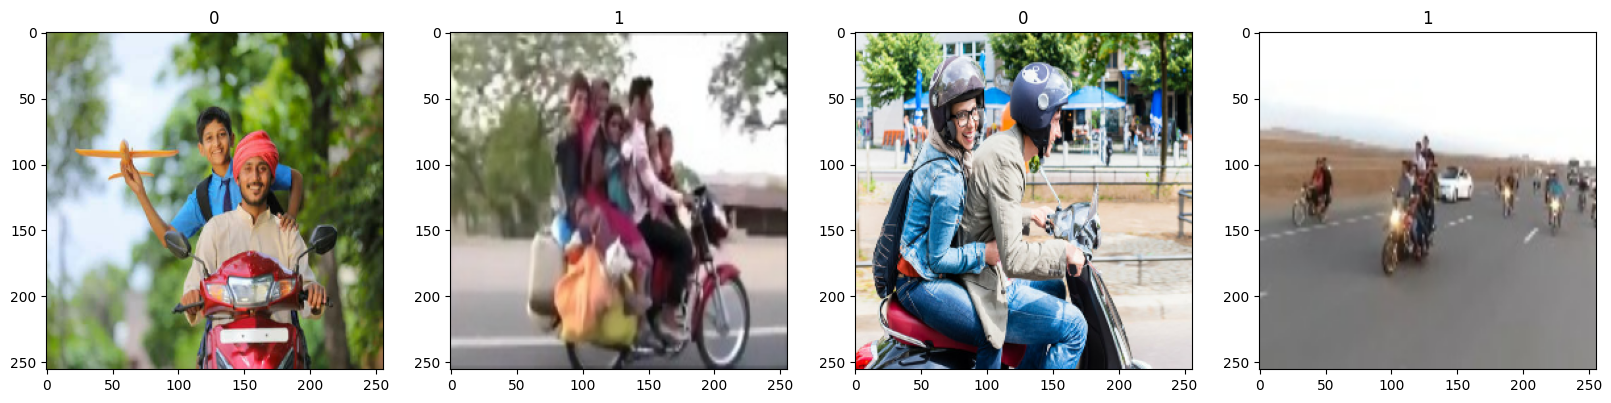

In [88]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [89]:
scaled = batch[0]/255

In [90]:
scaled.min()

0.0

PREPROCESSED DATA

Scale

In [91]:
data = data.map(lambda x,y: (x/255, y))

In [92]:
scaled_iterator = data.as_numpy_iterator()

In [93]:
batch = scaled_iterator.next()

Split Data

In [94]:
len(data)

14

In [95]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = len(data) - train_size - val_size

In [96]:
test_size + train_size + val_size

14

In [97]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [98]:
len(test)

3

DEEP LEARNING

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

TRAIN

In [104]:
logdir = 'logs'

In [105]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [106]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4351 - loss: 1.8483 - val_accuracy: 0.5156 - val_loss: 0.6627
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.5568 - loss: 0.6189 - val_accuracy: 0.7812 - val_loss: 0.5391
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.7911 - loss: 0.4451 - val_accuracy: 0.9375 - val_loss: 0.2523
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.8729 - loss: 0.2931 - val_accuracy: 0.8906 - val_loss: 0.2851
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.9183 - loss: 0.2233 - val_accuracy: 1.0000 - val_loss: 0.1168
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.9755 - loss: 0.1270 - val_accuracy: 0.9844 - val_loss: 0.0979
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.9577 - loss: 0.0973 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9851 - loss: 0.0677 - val_accuracy: 0.9844 - val_loss:

PLOT PERFORMANCE

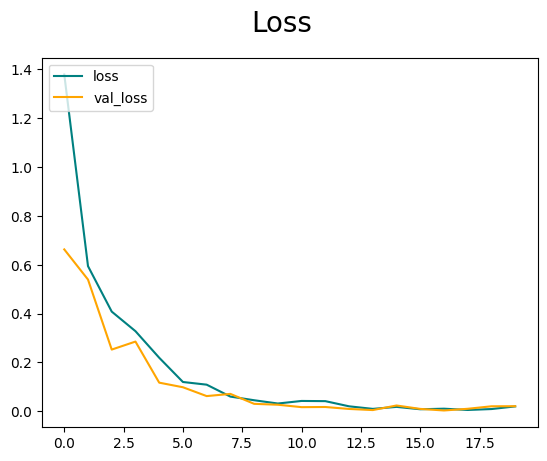

In [107]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

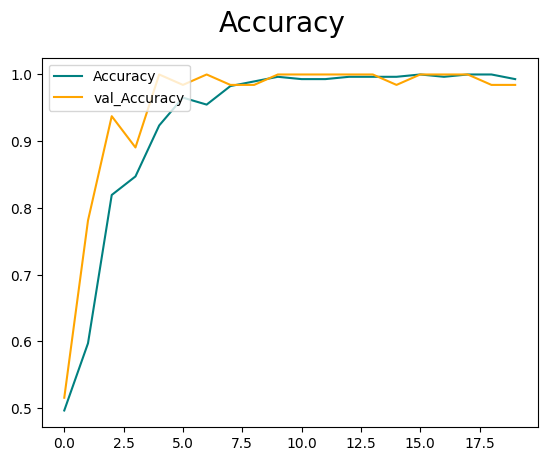

In [108]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

EVALUATE PERFORMANCE

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
len(test)

3

In [112]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [113]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


TEST

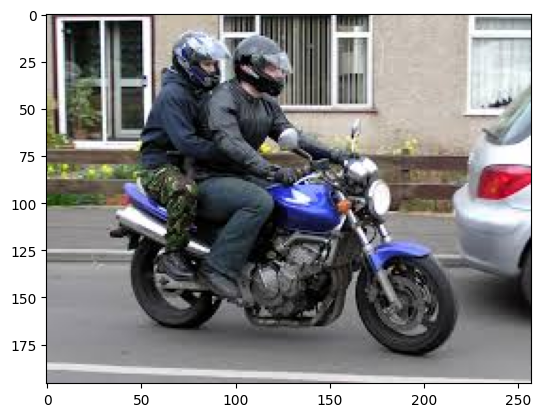

In [114]:
img = cv2.imread('img3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

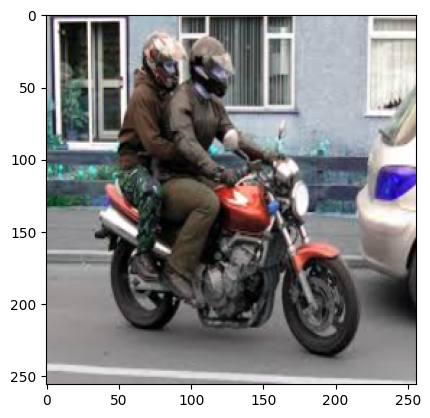

In [115]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
resize.shape

TensorShape([256, 256, 3])

In [117]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [118]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [119]:
yhat

array([[0.00010354]], dtype=float32)

In [120]:
if yhat > 0.5:
    print('Overcrowded')
else:
    print('Not-Overcrowded')

Not-Overcrowded


SAVE THE MODEL

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model.save(os.path.join('models', 'overloadedVehicles.keras'))

In [123]:
new_model = load_model(os.path.join('models', 'overloadedVehicles.keras'))

In [124]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [125]:
if yhat_new > 0.5:
    print('Overcrowded')
else:
    print('Not-Overcrowded')

Not-Overcrowded


In [136]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os
import tensorflow as tf

# Load the trained model
model = load_model(os.path.join('models', 'overloadedVehicles.keras'))

# Function to process a frame and detect objects
def process_frame(frame, cnt):
    folder_name = "violations"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    name = os.path.join(folder_name, "detected_object_" + str(cnt) + ".jpg")
    
    # Resize the frame and normalize it
    resized_frame = tf.image.resize(frame, (256, 256))
    normalized_frame = resized_frame / 255.0

    # Predict using the model
    prediction = model.predict(np.expand_dims(resized_frame / 255, 0))
    if prediction > 0.5:
        # Find contours of the detected object
        contours, _ = cv2.findContours(np.uint8(prediction[0] * 255), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw rectangle around each contour
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # Save the frame when object is detected
        cv2.imwrite(name, frame)


# Function to process video file
def process_video(video_file):
    cnt = 0
    cap = cv2.VideoCapture(video_file)
    if not cap.isOpened():
        print("Error: Couldn't open video file")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Process each frame
        cnt = cnt + 1
        process_frame(frame , cnt)

    cap.release()


# Run the code
if __name__ == "__main__":
    video_file = "input_video.mp4"  # Change this to the path of your video file
    process_video(video_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━